### Importering av bibliotek

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Innlastning av data og lineær regresjon

In [16]:
# Dype havstrømmer målt fra verdensrommet, lenke: https://ektedata.uib.no/oppgaver/dype-havstrommer-malt-fra-verdensrommet/

Dag = np.loadtxt('satellittmålinger.txt', usecols=0, skiprows=1, delimiter="," , dtype=int)
H_oest = np.loadtxt('satellittmålinger.txt', usecols=1, skiprows=1, delimiter="," , dtype=float)
H_vest = np.loadtxt('satellittmålinger.txt', usecols=2, skiprows=1, delimiter="," , dtype=float)
H_forskjell = H_vest - H_oest
Transport = np.loadtxt('vanntransportdata.txt', usecols=1, skiprows=1, delimiter="," , dtype=float)

k = 2.25
f=k*Dag/len(Dag)
H = np.column_stack((np.ones(len(Dag)), Dag, np.sin(2*np.pi*f), np.cos(2*np.pi*f)))
S = np.dot(np.linalg.inv(np.dot(H.T, H)), np.dot(H.T, H_forskjell)) # S = [a, b, c], S = (H^T*H)^(-1) * H^T * H_forskjell
S2 = np.dot(np.linalg.inv(np.dot(H.T, H)), np.dot(H.T, Transport))
H_est=S[0]+S[1]*Dag+S[2]*np.sin(2*np.pi*f) + S[3]*np.cos(2*np.pi*f)
T_est=S2[0]+S2[1]*Dag+S2[2]*np.sin(2*np.pi*f) + S2[3]*np.cos(2*np.pi*f)

L1=np.polyfit(Dag,H_forskjell,1)
Lin1 = L1[0]*Dag + L1[1] # y = ax + b
T1=np.polyfit(Dag,Transport,1)
T_Lin1 = T1[0]*Dag + T1[1]

Ht=np.polyfit(H_forskjell,Transport,1)
Ht_Lin = Ht[0]*H_forskjell + Ht[1]

f2 = Dag/len(Dag)
k2 = np.arange(0.5, 5 + 0.01, 0.5)

testCol=np.column_stack([np.ones(len(Dag))*kn for kn in k2])

M = np.column_stack([np.ones(len(Dag)), Dag] + [np.sin(2*np.pi*f2*kn) for kn in k2])
MS = np.dot(np.linalg.inv(np.dot(M.T, M)), np.dot(M.T, Transport))
M_est = MS[0] + MS[1]*Dag + sum([MS[i+2]*np.sin(2*np.pi*f2*k2[i]) for i in range(len(k2))]) 

### Plotting av data

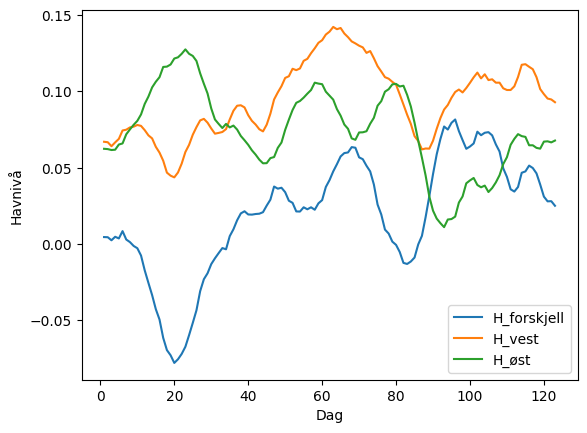

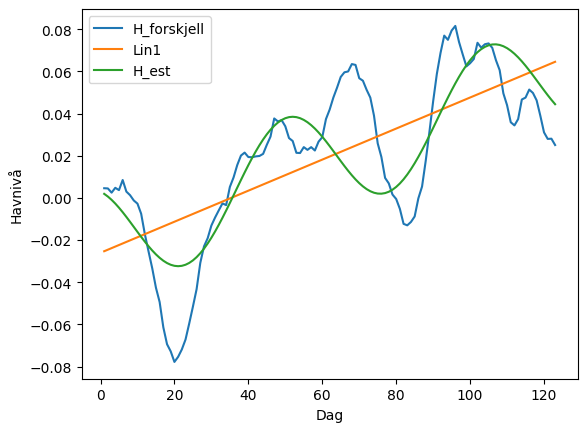

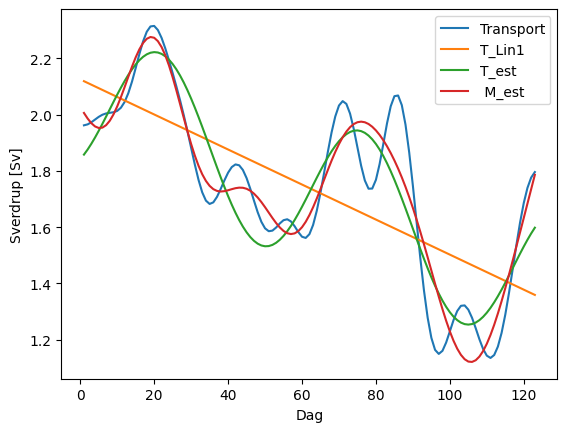

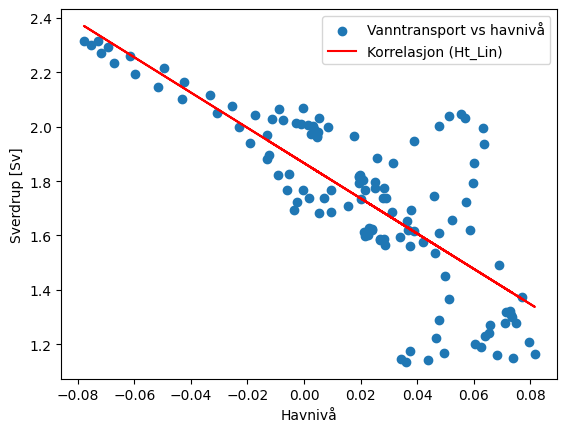

In [17]:
plt.plot(Dag,H_forskjell)
plt.plot(Dag,H_vest)
plt.plot(Dag,H_oest)
plt.xlabel("Dag") 
plt.ylabel("Havnivå")
plt.legend(["H_forskjell","H_vest","H_øst"])
plt.show()

plt.plot(Dag,H_forskjell)
plt.plot(Dag,Lin1)
plt.plot(Dag,H_est)
plt.xlabel("Dag") 
plt.ylabel("Havnivå")
plt.legend(["H_forskjell","Lin1","H_est"])
plt.show()

plt.plot(Dag,Transport)
plt.plot(Dag,T_Lin1)
plt.plot(Dag,T_est)
plt.plot(Dag,M_est)
plt.xlabel("Dag")
plt.ylabel("Sverdrup [Sv]")
plt.legend(["Transport","T_Lin1","T_est","M_est"])
plt.show()

plt.scatter(H_forskjell,Transport)
plt.plot(H_forskjell,Ht_Lin, color='red')
plt.xlabel("Havnivå")
plt.ylabel("Sverdrup [Sv]")
plt.legend(["Vanntransport vs havnivå","Korrelasjon (Ht_Lin)"])
plt.show()

### Lagring av ny data

In [18]:
Test = np.column_stack((Dag, H_forskjell, Lin1, H_est))
df = pd.DataFrame(Test, columns=["Dag", "H_forskjell", "Lin1", "H_est"])
df.to_csv("Test.csv", index=False)
df.to_csv("Test.txt", sep=" ", index=False)

In [19]:
test2=np.loadtxt("Test.txt", delimiter=" ", skiprows=1)
test3=pd.read_csv("Test.csv")